**D1DAE: Análise Estatística para Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
%%html
<style>.dashed-box{border:1px dashed #000!important}.dashed-box tr{background-color:#fff!important}.alt-tab{background-color:#000;color:#ffc351;padding:4px;font-size:1em;font-weight:700;font-family:monospace}</style>

<h1>Law of Large Numbers</h1><hr/>

Simulate multiple _roulette games_ considering that one is betting at **odd numbers** to win. <br/>
Consider that this roulette has 18 odd, 18 even, a zero number = **37 numbers**.

In [72]:
# expected value to win betting on odds
exp_win = 18 / 37
exp_win

0.4864864864864865

In [79]:
import random

random.seed(23)

# Run n roulette games.
# Win a game if an odd number was selected within [0, 36].
def roulette_odd(n: int) -> tuple:
    spin_numbers = []
    outcomes = []  # True=win, False=lose
 
    for _ in range(n):
        spin = random.randint(0, 36)  # 36 included
        spin_numbers.append(spin)
        outcomes.append(spin % 2 != 0)
 
    return spin_numbers, outcomes

In [80]:
# run the roulette game 100x
n_games = 100
spin_numbers, outcomes = roulette_odd(n_games)

# computed the prob. of win for each number of games (normalized cummulative histogram)
probs = []

game = 0
cumm_sum = 0

for out in outcomes:
    game += 1
    cumm_sum += out
    
    prob = cumm_sum / game
              
    probs.append(prob)

Text(0, 0.5, 'Prob. Win')

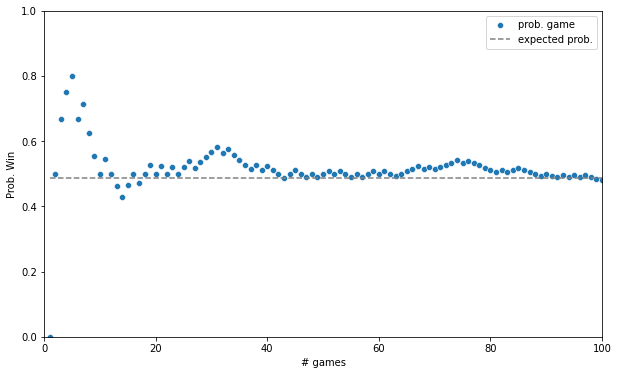

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

games = list(range(1, n_games + 1))

plt.figure(figsize=(10, 6))

sns.scatterplot(x=games, y=probs)
plt.hlines(y=exp_win, xmin=1, xmax=n_games, color='gray', linestyles='dashed')

plt.xlim(0, n_games)
plt.ylim(0, 1)

plt.legend(['prob. game', 'expected prob.'])
plt.xlabel('# games')
plt.ylabel('Prob. Win')